In [ ]:
%matplotlib inline

In [1]:
import os
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"]="1"

In [2]:
import sys
grounding_dino_path = "/Users/stephen/git/GroundingDINO"
if grounding_dino_path not in sys.path:
    sys.path.append(grounding_dino_path)

In [3]:
import torch
import matplotlib.pyplot as plt

In [39]:
from groundingdino.util.inference import load_model, load_image, predict, annotate
import cv2

model = load_model("groundingdino/config/GroundingDINO_SwinT_OGC.py", "weights/groundingdino_swint_ogc.pth")


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [53]:
%%time
IMAGE_PATH = "/Users/stephen/Documents/exportScreens/scene00051.png"
TEXT_PROMPT = "shiny rectangle"

IMAGE_PATH = "/Users/stephen/Downloads/Blog-Image-980x551.jpg"
TEXT_PROMPT = "first one left dogs"

BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    device="mps",
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

CPU times: user 8.16 s, sys: 1.65 s, total: 9.81 s
Wall time: 6.51 s


In [54]:
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
#cv2.imwrite("annotated_image.jpg", annotated_frame)

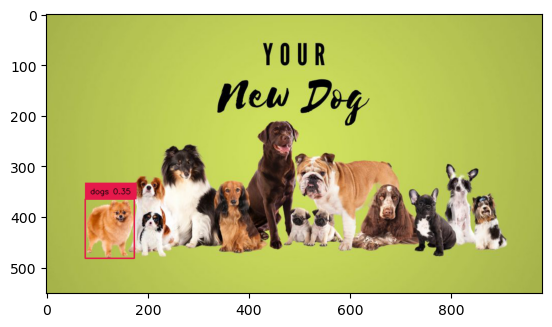

In [55]:
plt.imshow(annotated_frame[:,:,::-1])